# Minimal Example with TensorFlow 2.0

In this notebook we will recreate our machine learning algorithm using TF 2.0

## Import the relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Generation

In [4]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [5]:
training_data = np.load('TF_intro.npz')

In [18]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                          )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 2s - loss: 36.5088 - 2s/epoch - 55ms/step
Epoch 2/100
32/32 - 0s - loss: 1.1391 - 94ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4909 - 51ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3809 - 62ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3810 - 27ms/epoch - 844us/step
Epoch 6/100
32/32 - 0s - loss: 0.3775 - 68ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3992 - 86ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 0.4220 - 31ms/epoch - 967us/step
Epoch 9/100
32/32 - 0s - loss: 0.3655 - 39ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3745 - 72ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3904 - 38ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3703 - 40ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.4175 - 35ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3747 - 41ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4253 - 37ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3972 - 36ms/epoch - 1ms/st

## Extract the weights and biases

In [19]:
model.layers[0].get_weights()

[array([[ 2.1083896],
        [-3.024014 ]], dtype=float32),
 array([5.011015], dtype=float32)]

In [20]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.1083896],
       [-3.024014 ]], dtype=float32)

In [21]:
biases = model.layers[0].get_weights()[1]
biases

array([5.011015], dtype=float32)

## Extract the outputs (make predictions)

In [22]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 29.9],
       [  6.8],
       [ 46.6],
       [  7.6],
       [ 18.1],
       [  6.5],
       [ 14.3],
       [-12.4],
       [ 30.4],
       [  4.5],
       [ 44.7],
       [-23.4],
       [  3.6],
       [ 10.3],
       [ -5.7],
       [ 28.1],
       [ 29. ],
       [ 34.7],
       [  5.1],
       [-27.1],
       [-11.5],
       [-24.4],
       [-10. ],
       [ 43.3],
       [-18.3],
       [ -3.1],
       [ 37.8],
       [ 21. ],
       [-28.2],
       [-11.9],
       [ -1. ],
       [ 39.4],
       [ 28.1],
       [-17.4],
       [ 21.7],
       [ 17.8],
       [ 19.5],
       [ 49.1],
       [-23.4],
       [ 12. ],
       [-30.6],
       [ 22. ],
       [-20.5],
       [  2.4],
       [ -6. ],
       [ 30.7],
       [ -8.9],
       [ -5.8],
       [ -5.4],
       [ -9.9],
       [ 36.3],
       [ 26.3],
       [  3.4],
       [ 44. ],
       [ 24.1],
       [-27. ],
       [ 21.4],
       [ 23.8],
       [  3.4],
       [ 11.9],
       [-24.1],
       [  6.5],
       [

In [23]:
training_data['targets'].round(1)

array([[ 28.7],
       [  5.9],
       [ 45.1],
       [  7.9],
       [ 18.1],
       [  6.1],
       [ 13.7],
       [-12.3],
       [ 30.2],
       [  4. ],
       [ 44.4],
       [-23.5],
       [  2.9],
       [ 10.9],
       [ -4.4],
       [ 28.2],
       [ 29.3],
       [ 34.1],
       [  5.3],
       [-26.8],
       [-10.7],
       [-23.2],
       [-11.3],
       [ 41.7],
       [-17.1],
       [ -4.5],
       [ 36. ],
       [ 19.9],
       [-28. ],
       [-12.3],
       [ -1.8],
       [ 37.7],
       [ 27.2],
       [-16.4],
       [ 21.8],
       [ 17.5],
       [ 19.8],
       [ 48.6],
       [-22.5],
       [ 12.9],
       [-28.6],
       [ 21.9],
       [-20.4],
       [  2.3],
       [ -6.4],
       [ 30.3],
       [ -7.7],
       [ -5.4],
       [ -4.7],
       [ -9.6],
       [ 35.3],
       [ 27.2],
       [  4. ],
       [ 42.6],
       [ 23.2],
       [-25.6],
       [ 21.3],
       [ 22.8],
       [  4.8],
       [ 11.4],
       [-23.6],
       [  6. ],
       [

## Plotting the data

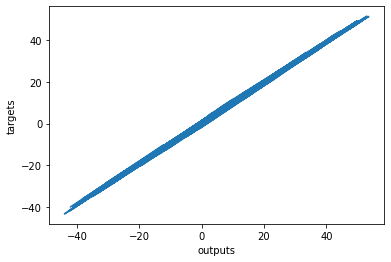

In [24]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()